<a href="https://colab.research.google.com/github/jaymalak/Capstone1/blob/master/Capstone_Project_I__v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Fetched for MYSQL and CSV

In [2]:
!pip install mysql.connector

     |████████████████████████████████| 11.9MB 2.8MB/s 
  Created wheel for mysql.connector: filename=mysql_connector-2.2.9-cp36-cp36m-linux_x86_64.whl size=247949 sha256=c11b847a5d3aa868a0740bc0025f8cb92e069358d0fb740ef03dbc4da3bf8ed7
  Stored in directory: /root/.cache/pip/wheels/8c/83/a1/f8b6d4bb1bd6208bbde1608bbfa7557504bed9eaf2ecf8c175
Successfully built mysql.connector


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline

In [0]:
from mysql.connector import Error

In [0]:

import mysql.connector

In [6]:
try:
   connection = mysql.connector.connect(host='cpanel.insaid.co', database='Capstone1', user='student',password='student')

   if connection.is_connected():
     db_info = connection.get_server_info()
     print("connected to MySQ Server version", db_info)
     sql_gender_age = "select * from gender_age_train"
     sql_ph_brand = "select * from phone_brand_device_model"
    
     cursor = connection.cursor()
     cursor.execute(sql_gender_age)
     record = cursor.fetchall()
     gender_age_train = pd.DataFrame(record)
     
     cursor.execute(sql_ph_brand)
     record1 = cursor.fetchall()
     phone_brand = pd.DataFrame(record1)

 
except Error as e :
  print ("Error while connecting  to MySQL", e)

finally :
  if (connection.is_connected()) :
    cursor.close()
    connection.close()
    print("MySQL connection is closed")

connected to MySQ Server version 5.6.46-cll-lve
MySQL connection is closed


In [7]:
connection

In [23]:
gender_age_train.head()

,0,1,2,3
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [24]:
phone_brand.head()

,0,1,2
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,小米,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,三星,A368t
4,-2015528097870762664,小米,红米Note2


In [25]:
gender_age_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
0    74645 non-null int64
1    74645 non-null object
2    74645 non-null int64
3    74645 non-null object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [26]:
phone_brand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
0    87726 non-null int64
1    87726 non-null object
2    87726 non-null object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [27]:
gender_age_train.shape

(74645, 4)

In [28]:
phone_brand.shape

(87726, 3)

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [16]:

link = 'https://drive.google.com/open?id=1ggM3ZXElSob6ZSzWaiNNT3SgiNDHGv6d' # The shareable link
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1ggM3ZXElSob6ZSzWaiNNT3SgiNDHGv6d


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('events.csv')  
events = pd.read_csv('events.csv')

In [0]:
#pd.set_option('float_format', '{:f}'.format)

In [31]:
events.head()

,event_id,device_id,timestamp,longitude,latitude,city,state
0,1.0,2.918269e+16,2016-05-01 00:55:25,77.266049,28.68161,Delhi,Delhi
1,7104.0,2.918269e+16,2016-05-02 09:37:02,77.266049,28.68161,Delhi,Delhi
2,29661.0,2.918269e+16,2016-05-04 00:56:04,77.266049,28.68161,Delhi,Delhi
3,33133.0,2.918269e+16,2016-05-06 05:01:15,77.266049,28.68161,Delhi,Delhi
4,38980.0,2.918269e+16,2016-05-06 09:55:04,77.266049,28.68161,Delhi,Delhi


In [32]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
event_id     float64
device_id    float64
timestamp    object
longitude    float64
latitude     float64
city         object
state        object
dtypes: float64(4), object(3)
memory usage: 173.7+ MB


In [0]:
gender_age_train.columns=['device_id','gender','age','age_group']

In [24]:
gender_age_train.head()

,device_id,gender,age,age_group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [34]:
gender_age_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
device_id    74645 non-null int64
gender       74645 non-null object
age          74645 non-null int64
age_group    74645 non-null object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [0]:
phone_brand.columns=['device_id','brand','model']

In [36]:
phone_brand.head()

,device_id,brand,model
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,小米,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,三星,A368t
4,-2015528097870762664,小米,红米Note2


In [37]:
phone_brand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
device_id    87726 non-null int64
brand        87726 non-null object
model        87726 non-null object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [27]:
gender_age_train.groupby(by='age_group')

In [28]:
#missing data in gender_age_train
total = gender_age_train.isnull().sum().sort_values(ascending=False)
percent = (gender_age_train.isnull().sum()/gender_age_train.isnull().count()).sort_values(ascending=False)
missing_data_genderage = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_genderage.head(20)
print(missing_data_genderage)


           Total  Percent
age_group      0 0.000000
age            0 0.000000
gender         0 0.000000
device_id      0 0.000000


In [29]:
##missing data in phone_brand
total = phone_brand.isnull().sum().sort_values(ascending=False)
percent = (phone_brand.isnull().sum()/phone_brand.isnull().count()).sort_values(ascending=False)
missing_data_phoneband = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_phoneband.head(20)
print(missing_data_phoneband)


           Total  Percent
model          0 0.000000
brand          0 0.000000
device_id      0 0.000000


In [30]:
##missing data in events
total = events.isnull().sum().sort_values(ascending=False)
percent = (events.isnull().sum()/events.isnull().count()).sort_values(ascending=False)
missing_data_events = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_events.head(20)
print(missing_data_events)

           Total  Percent
device_id    453 0.000139
latitude     423 0.000130
longitude    423 0.000130
state        377 0.000116
city           0 0.000000
timestamp      0 0.000000
event_id       0 0.000000


Text(0, 0.5, 'Count')

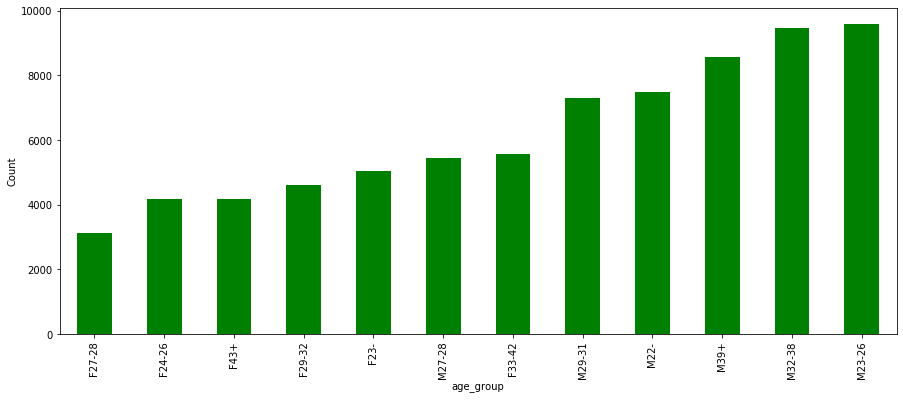

In [31]:
plt.figure(figsize = (15, 6))
gender_age_train.groupby('age_group')['age'].count().sort_values(ascending=True).plot(kind='bar', color='g')
plt.ylabel('Count')


Observation :
1. Age grouping is contactinated with Gender due to which group analyis misguiding. Age Grouping is different for male and female

In [32]:
gender_age_train['gendersub'] =gender_age_train.age_group.str.slice(1,6)
gender_age_train.head()

,device_id,gender,age,age_group,gendersub
0,-8076087639492063270,M,35,M32-38,32-38
1,-2897161552818060146,M,35,M32-38,32-38
2,-8260683887967679142,M,35,M32-38,32-38
3,-4938849341048082022,M,30,M29-31,29-31
4,245133531816851882,M,30,M29-31,29-31


Text(0, 0.5, 'Count')

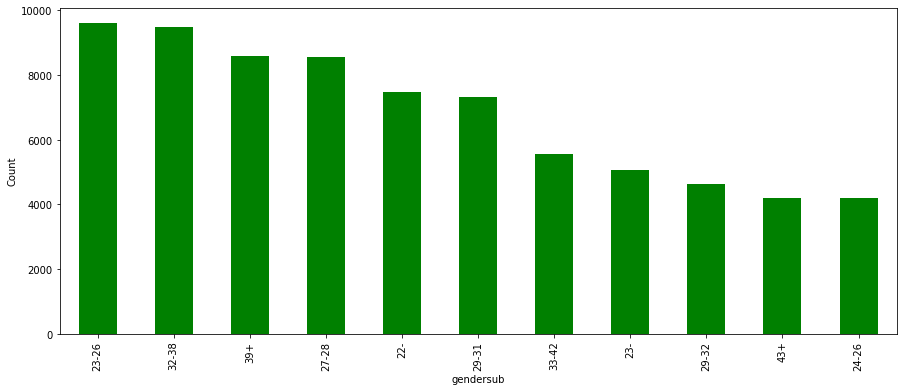

In [33]:
plt.figure(figsize = (15, 6))
gender_age_train.groupby('gendersub')['device_id'].count().sort_values(ascending=False).plot(kind='bar', color='g')
plt.ylabel('Count')

In [34]:
print("distinct age_group:", set(gender_age_train['age_group']))


distinct age_group: {'M29-31', 'F43+', 'F24-26', 'M32-38', 'F33-42', 'F29-32', 'F23-', 'F27-28', 'M39+', 'M27-28', 'M22-', 'M23-26'}


In [35]:
pd.crosstab(gender_age_train['age'],gender_age_train['age_group'] )

age_group,F23-,F24-26,F27-28,F29-32,F33-42,F43+,M22-,M23-26,M27-28,M29-31,M32-38,M39+
age,,,,,,,,,,,,
1,0,0,0,0,0,0,1,0,0,0,0,0
6,0,0,0,0,0,0,4,0,0,0,0,0
10,2,0,0,0,0,0,3,0,0,0,0,0
11,4,0,0,0,0,0,0,0,0,0,0,0
12,5,0,0,0,0,0,9,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
88,0,0,0,0,0,3,0,0,0,0,0,2
89,0,0,0,0,0,3,0,0,0,0,0,0
90,0,0,0,0,0,0,0,0,0,0,0,1


In [0]:
gender_age_train.device_id=gender_age_train.astype(str)
phone_brand.device_id = phone_brand.astype(str)
events.device_id = events.astype(str)
events.event_id = events.astype(str)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8393a839e8>,
      dtype=object)

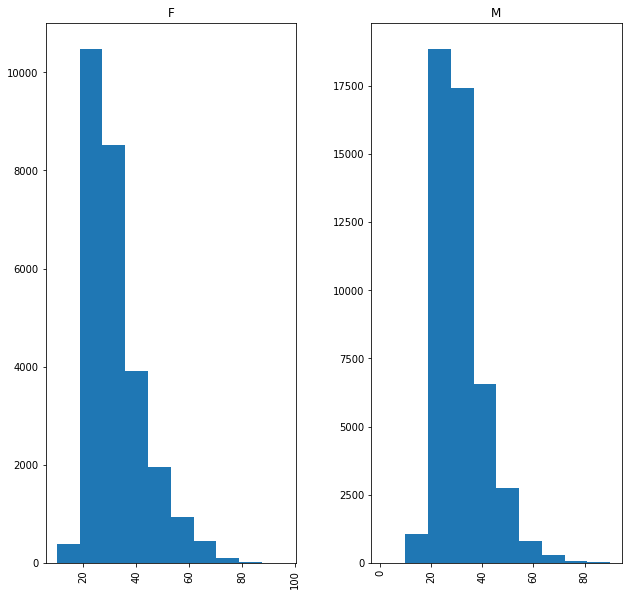

In [36]:
gender_age_train.hist(by='gender',column = 'age',figsize=(10,10))

In [37]:
phone_brand.groupby('model')['device_id'].count().sort_values(ascending=False).head(20)

model
红米note           3500
MI 3             2739
MI 2S            2547
Galaxy Note 3    2378
MI 4             2256
Galaxy S4        1910
Galaxy Note 2    1877
荣耀6              1471
荣耀畅玩4X           1279
荣耀3C             1206
红米1S             1191
红米               1168
Galaxy S3        1156
Mate 7           1125
魅蓝NOTE           1026
红米2               941
红米Note2           903
MX3               842
Galaxy S5         827
荣耀6 Plus          815
Name: device_id, dtype: int64

In [38]:
print("distinct Model:", set(phone_brand['model']))

distinct Model: {'V4', 'Moto Turbo', 'U807', 'L1 mini', '红米2A', 'SM-T2558', 'EVO 3D X515m', 'V981', 'I6', 'E621T', 'E7', '乐玩2C', 'GN700T', 'A630', 'M20-T', 'GN9002', 'K900', 'Ascend G7', 'Galaxy Trend DUOS', 'S870e', 'S5.1', 'Ascend GX1', 'A2860', '9300-M9', 'A375e', 'H7', 'P8', '7295+', '荣耀平板T1-823L', '大神F2全高清版', '8712', 'U969', 'Y618-T00', 'A750e', '795+', 'MI 4', '魅蓝2', '7105', 'G520-5000', 'S696', 'G615-U10', 'E600M', 'K23', 'A780e', 'LT988', 'Xperia ZL', 'R1C', 'L820c', 'S850', 'G3819D', 'R823T', 'Q302C', 'X5', 'Moto X', 'F105', 'G730-C00', 'Sonic+', 'Z5S', 'V956', 'A520', 'M210', 'X98 Air 3G', 'U817', '5832', 'X5V', 'SM-T705C', 'GN715', 'GN700W', 'A278t', 'MI 1', 'memo 5S', 'A388t', '5890', 'Y320T', 'Galaxy Alpha', '小辣椒 3', 'One M9+', 'MI pad 2', '荣耀畅玩5X', 'A2580', 'Galaxy S2 HD LTE E120S', 'GN9004', 'My 布拉格', 'A2800d', 'T1-821w', '8717', '红辣椒Note3', 'Desire V', 'Xperia S', 'Galaxy S7 Edge', 'U59GT', 'T21', 'MM1101', 'MI 2S', 'A805e', 'Xshot', 'S6-NT1', 'IVO 6688', '魅蓝NOTE', 'X5M

In [39]:
phone_brand['model'].value_counts().count()

1467

In [40]:
phone_brand['brand'].value_counts().count()

116

In [41]:
phone_brand.groupby('brand')['model'].value_counts().count()   ##.sort_values(ascending=False).plot(kind='bar', color='g')

1522

In [42]:
df = pd.crosstab(phone_brand['brand'],phone_brand['model'] ).sum()
df.tail()

model
麦芒4          201
黄金斗士A8       150
黄金斗士Note8     33
黄金斗士S8畅玩版      6
黄金斗士青春版        5
dtype: int64

In [43]:
pd.crosstab(phone_brand['brand'],phone_brand['model'] )

model,1100,1105,1107,2,201,2016版 Galaxy A5,2016版 Galaxy A7,2016版 Galaxy A9,2016版 Galaxy J7,210R,2C,3,3000,3005,3007,302U,3S,5200,5200S,5216D,5216s,5217,5218S,5219,5261,5263,5263S,5310,5311,5313S,5316,5360,5832,5860A,5860S,5872,5876,5879,5890,5891,...,荣耀畅玩4C运动版,荣耀畅玩4X,荣耀畅玩5,荣耀畅玩5X,荣耀畅玩平板T1,超级手机1,超级手机1 Pro,超级手机1s,超级手机Max,远航3,醉享,野火S,金刚II,金钢,锋尚,锋尚2,锋尚Max,锋尚Pro,雷霆战机,青春版,青漾3,领世旗舰3,风华3,飞马,飞马2 Plus,飞马3,魅蓝,魅蓝2,魅蓝NOTE,魅蓝Note 2,魅蓝Note3,魅蓝metal,魔镜 X5,麦芒3,麦芒3S,麦芒4,黄金斗士A8,黄金斗士Note8,黄金斗士S8畅玩版,黄金斗士青春版
brand,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
E人E本,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
E派,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
HTC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LG,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LOGO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
飞秒,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
首云,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
魅族,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,190,352,1026,786,1,217,0,0,0,0,0,0,0,0


In [39]:
device_merge = pd.merge(gender_age_train,phone_brand, how='inner', left_on='device_id', right_on='device_id')
device_merge.head()

,device_id,gender,age,age_group,brand,model
0,-8076087639492063270,M,35,M32-38,小米,MI 2
1,-2897161552818060146,M,35,M32-38,小米,MI 2
2,-8260683887967679142,M,35,M32-38,小米,MI 2
3,-4938849341048082022,M,30,M29-31,三星,Galaxy S4
4,245133531816851882,M,30,M29-31,SUGAR,时尚手机


In [40]:
device_merge.count()

device_id    74617
gender       74617
age          74617
age_group    74617
brand        74617
model        74617
dtype: int64

In [41]:
pd.crosstab(events['state'],events['city'] )

city,Abohar,Achalpur,Adilabad,Adityapur,Adoni,Agartala,Agra,Ahmadabad,Ahmadnagar,Aizawl,Ajmer,Akola,Akot,Alandur,Alappuzha,Aligarh,AlipurDuar,Allahabad,Alwal,Alwar,Amalner,Ambajogai,Ambala,AmbalaCantonment,AmbalaSadar,Ambattur,Ambikapur,Ambur,Amravati,Amreli,Amritsar,Amroha,Anakapalle,Anand,Anantapur,Anantnag,Anjangaon,Anjar,Aonla,Arakonam,...,Upleta,UppalKalan,UranIslampur,UttarparaKotrung,Vadakara,Vadodara,Valparai,Valsad,Vaniyambadi,Vapi,Varanasi,Vasai,Velluru,Veraval,Vidisha,Vijayawada,Viluppuram,Vinukonda,Virappanchatram,Virar,Virudhachalam,Virudunagar,Visakhapatnam,Visnagar,Vizianagaram,Vrindavan,Vuyyuru,Wadhwan,Wani,Wanparti,Warangal,Wardha,Warud,Washim,Wokha,Yadgir,Yamunanagar,Yavatmal,Yelahanka,Yemmiganur
state,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AndamanandNicobarIslands,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AndhraPradesh,0,0,1010,0,930,0,0,0,0,0,0,0,0,0,0,0,0,0,704,0,0,0,0,0,0,0,0,0,0,0,0,0,627,0,966,0,0,0,0,0,...,0,571,0,0,0,0,0,0,0,0,0,0,0,0,0,671,0,929,0,0,0,0,235725,0,600,0,823,0,0,594,842,0,0,0,0,0,0,0,0,1180
ArunachalPradesh,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Assam,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Bihar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Chandigarh,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Chhattisgarh,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,539,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Delhi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Goa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
events.groupby(['state','city'])['city'].count()

state                     city            
AndamanandNicobarIslands  PortBlair           1515
AndhraPradesh             Adilabad            1010
                          Adoni                930
                          Alwal                704
                          Anakapalle           627
                                              ... 
WestBengal                Siuri                433
                          SouthDumDum         1072
                          Titagarh            1207
                          Ulubaria             877
                          UttarparaKotrung     749
Name: city, Length: 943, dtype: int64

In [43]:
events.query('state in ["MadhyaPradesh","Chhattisgarh", "Uttaranchal", "JammuandKashmir","Goa", "Nagaland"]')

,event_id,device_id,timestamp,longitude,latitude,city,state
2197849,10117.0,-5.323073e+18,2016-05-01 11:11:24,75.939543,22.769170,Indore,MadhyaPradesh
2197850,112369.0,-5.323073e+18,2016-05-04 22:47:19,75.939543,22.769170,Indore,MadhyaPradesh
2197851,139098.0,-5.323073e+18,2016-05-01 09:55:58,75.939543,22.769170,Indore,MadhyaPradesh
2197852,190983.0,-5.323073e+18,2016-05-04 22:51:03,75.939543,22.769170,Indore,MadhyaPradesh
2197853,249507.0,-5.323073e+18,2016-05-01 11:24:12,75.939543,22.769170,Indore,MadhyaPradesh
...,...,...,...,...,...,...,...
2458992,3218198.0,8.277000e+18,2016-05-04 22:19:40,78.305512,22.129845,Sarni,MadhyaPradesh
2458993,3241226.0,-4.634263e+18,2016-05-03 17:26:40,76.398631,21.859325,Khandwa,MadhyaPradesh
2458994,3246861.0,3.633748e+18,2016-05-04 20:40:35,94.126143,25.685510,Kohima,Nagaland
2458995,3247285.0,2.609354e+18,2016-05-06 20:34:47,78.235033,24.248452,BinaEtawa,MadhyaPradesh


In [44]:
df_event = events.query('state in ["MadhyaPradesh","Chhattisgarh", "Uttaranchal", "JammuandKashmir","Goa", "Nagaland"]')
df_event.head()

,event_id,device_id,timestamp,longitude,latitude,city,state
2197849,10117.0,-5.323073e+18,2016-05-01 11:11:24,75.939543,22.76917,Indore,MadhyaPradesh
2197850,112369.0,-5.323073e+18,2016-05-04 22:47:19,75.939543,22.76917,Indore,MadhyaPradesh
2197851,139098.0,-5.323073e+18,2016-05-01 09:55:58,75.939543,22.76917,Indore,MadhyaPradesh
2197852,190983.0,-5.323073e+18,2016-05-04 22:51:03,75.939543,22.76917,Indore,MadhyaPradesh
2197853,249507.0,-5.323073e+18,2016-05-01 11:24:12,75.939543,22.76917,Indore,MadhyaPradesh


In [45]:
pd.crosstab(df_event['state'],df_event['city'] )

city,Ambikapur,Anantnag,Ashoknagar,Balaghat,Baramula,Basoda,Betul,Bhilai,Bhind,Bhopal,Bilaspur,BinaEtawa,Burhanpur,Charoda,Chhatarpur,Chhindwara,Chirmiri,Dabra,Damoh,Datia,DehraDun,DehraDunCantonment,Dewas,Dhamtari,Dhar,Dimapur,Durg,Gohad,Guna,Gwalior,Haldwani,Harda,Haridwar,Hoshangabad,Indore,Itarsi,Jabalpur,JabalpurCantonment,Jagdalpur,Jammu,...,Kohima,Korba,Madgaon,Mandidip,Mandsaur,Mau,Morena,Mormugao,Murwara,Nagda,Nimach,Panaji,Pithoragarh,Raghogarh,Raigarh,Raipur,Rajnandgaon,Ratlam,Rewa,Rishikesh,Rurki,Sagar,Sarni,Satna,Sehore,Sendhwa,Seoni,Shahdol,Shajapur,Sheopur,Shivapuri,Sidhi,Singrauli,Sopur,Srinagar,Tikamgarh,Udhampur,Ujjain,Vidisha,Wokha
state,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Chhattisgarh,539,0,0,0,0,0,0,911,0,0,1145,0,0,645,0,0,816,0,0,0,0,0,0,326,0,0,873,0,0,0,0,0,0,0,0,0,0,0,1382,0,...,0,858,0,0,0,0,0,0,0,0,0,0,0,0,577,648,1034,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Goa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,497,0,0,0,0,2352,0,0,0,401,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
JammuandKashmir,0,1103,0,0,519,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,771,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,961,342,0,745,0,0,0
MadhyaPradesh,0,0,1145,534,0,973,1301,0,666,1083,0,422,501,0,1050,1658,0,808,1505,950,0,0,506,0,905,0,0,854,915,868,0,895,0,585,189753,983,759,918,0,0,...,0,0,0,830,636,642,909,0,649,966,600,0,0,1140,0,0,0,824,593,0,0,646,843,513,1002,348,364,1778,1132,570,635,922,894,0,0,1268,0,480,873,0
Nagaland,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,584,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,614,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1100
Uttaranchal,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1053,923,0,0,0,0,0,0,0,0,1135,0,427,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,697,0,0,0,0,0,0,500,1274,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Text(0, 0.5, 'Count')

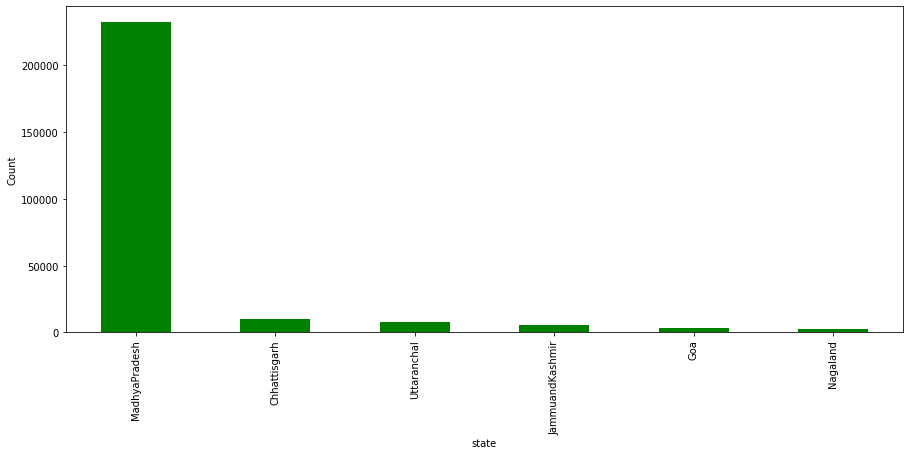

In [46]:
plt.figure(figsize = (15, 6))
df_event.groupby('state')['city'].count().sort_values(ascending=False).plot(kind='bar', color='g')
plt.ylabel('Count')

In [47]:
df_event.groupby(['city','state'])['event_id'].count()

city        state          
Ambikapur   Chhattisgarh        539
Anantnag    JammuandKashmir    1103
Ashoknagar  MadhyaPradesh      1145
Balaghat    MadhyaPradesh       534
Baramula    JammuandKashmir     519
                               ... 
Tikamgarh   MadhyaPradesh      1268
Udhampur    JammuandKashmir     745
Ujjain      MadhyaPradesh       480
Vidisha     MadhyaPradesh       873
Wokha       Nagaland           1100
Name: event_id, Length: 85, dtype: int64

In [48]:
##missing data in events
total = df_event.isnull().sum().sort_values(ascending=False)
percent = (df_event.isnull().sum()/df_event.isnull().count()).sort_values(ascending=False)
missing_data_dfevents = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_dfevents.head(20)
print(missing_data_dfevents)

           Total   Percent
latitude      63  0.000241
longitude     63  0.000241
device_id     51  0.000195
state          0  0.000000
city           0  0.000000
timestamp      0  0.000000
event_id       0  0.000000


In [49]:
gender_age_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
device_id    74645 non-null int64
gender       74645 non-null object
age          74645 non-null int64
age_group    74645 non-null object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [50]:
phone_brand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
device_id    87726 non-null int64
brand        87726 non-null object
model        87726 non-null object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [51]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
event_id     float64
device_id    float64
timestamp    object
longitude    float64
latitude     float64
city         object
state        object
dtypes: float64(4), object(3)
memory usage: 173.7+ MB


In [52]:
df_event.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261097 entries, 2197849 to 2458996
Data columns (total 7 columns):
event_id     261097 non-null float64
device_id    261046 non-null float64
timestamp    261097 non-null object
longitude    261034 non-null float64
latitude     261034 non-null float64
city         261097 non-null object
state        261097 non-null object
dtypes: float64(4), object(3)
memory usage: 15.9+ MB


In [53]:
device_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74617 entries, 0 to 74616
Data columns (total 6 columns):
device_id    74617 non-null int64
gender       74617 non-null object
age          74617 non-null int64
age_group    74617 non-null object
brand        74617 non-null object
model        74617 non-null object
dtypes: int64(2), object(4)
memory usage: 4.0+ MB


In [54]:
event_age = pd.merge(events,phone_brand,how='inner', left_on='device_id', right_on='device_id')
event_age.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/reshape/merge.py:1089: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  UserWarning,


,event_id,device_id,timestamp,longitude,latitude,city,state,brand,model
0,492.0,2.973348e+18,2016-05-04 00:12:23,77.225676,28.73014,Delhi,Delhi,优米,UIMI3
1,38049.0,2.973348e+18,2016-05-02 09:15:32,77.225676,28.73014,Delhi,Delhi,优米,UIMI3
2,58908.0,2.973348e+18,2016-05-03 20:59:11,77.225676,28.73014,Delhi,Delhi,优米,UIMI3
3,58957.0,2.973348e+18,2016-05-03 21:51:04,77.225676,28.73014,Delhi,Delhi,优米,UIMI3
4,73519.0,2.973348e+18,2016-05-01 07:15:53,77.225676,28.73014,Delhi,Delhi,优米,UIMI3


In [56]:
final_set = pd.merge(device_merge, df_event,how='inner', left_on='device_id', right_on='device_id')
final_set.head()

,device_id,gender,age,age_group,brand,model,event_id,timestamp,longitude,latitude,city,state
0,8765877367300380672,F,32,F29-32,三星,Galaxy Grand 2,12768.0,2016-05-07 12:55:54,75.930756,22.802167,Indore,MadhyaPradesh
1,8765877367300380672,F,32,F29-32,三星,Galaxy Grand 2,59684.0,2016-05-06 21:53:45,75.930756,22.802167,Indore,MadhyaPradesh
2,8765877367300380672,F,32,F29-32,三星,Galaxy Grand 2,64433.0,2016-05-05 01:06:25,75.930756,22.802167,Indore,MadhyaPradesh
3,8765877367300380672,F,32,F29-32,三星,Galaxy Grand 2,64719.0,2016-05-01 02:06:17,75.930756,22.802167,Indore,MadhyaPradesh
4,8765877367300380672,F,32,F29-32,三星,Galaxy Grand 2,70041.0,2016-05-05 00:11:47,75.930756,22.802167,Indore,MadhyaPradesh


In [60]:
final_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2824 entries, 0 to 2823
Data columns (total 12 columns):
device_id    2824 non-null int64
gender       2824 non-null object
age          2824 non-null int64
age_group    2824 non-null object
brand        2824 non-null object
model        2824 non-null object
event_id     2824 non-null float64
timestamp    2824 non-null object
longitude    2824 non-null float64
latitude     2824 non-null float64
city         2824 non-null object
state        2824 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 286.8+ KB


In [57]:
final_set.describe()

,device_id,age,event_id,longitude,latitude
count,2.824000e+03,2824.000000,2.824000e+03,2824.000000,2824.000000
mean,9.717270e+17,34.565864,1.657972e+06,76.455842,23.239040
std,3.962442e+18,11.625971,9.398817e+05,2.685858,1.800816
min,-9.086138e+18,14.000000,1.044100e+04,73.866551,15.548266
25%,-5.334703e+17,26.000000,8.500512e+05,75.891763,22.749997
50%,2.940447e+15,32.000000,1.676767e+06,75.921014,22.794318
75%,1.337418e+18,39.000000,2.476516e+06,75.946201,22.806684
max,8.765877e+18,57.000000,3.247141e+06,94.190182,33.749656


In [58]:
all_set = pd.merge(device_merge, events,how='inner', left_on='device_id', right_on='device_id')
all_set.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/reshape/merge.py:1100: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  UserWarning,


,device_id,gender,age,age_group,brand,model,event_id,timestamp,longitude,latitude,city,state
0,-6552729385743211,M,28,M27-28,vivo,X3T,189757.0,2016-05-07 21:40:38,78.487472,17.338947,Rajendranagar,AndhraPradesh
1,-6552729385743211,M,28,M27-28,vivo,X3T,190875.0,2016-05-04 22:31:06,78.487472,17.338947,Rajendranagar,AndhraPradesh
2,-6552729385743211,M,28,M27-28,vivo,X3T,236452.0,2016-05-04 21:45:10,78.487472,17.338947,Rajendranagar,AndhraPradesh
3,-6552729385743211,M,28,M27-28,vivo,X3T,237777.0,2016-05-04 22:33:57,78.487472,17.338947,Rajendranagar,AndhraPradesh
4,-6552729385743211,M,28,M27-28,vivo,X3T,289077.0,2016-05-04 21:14:14,78.487472,17.338947,Rajendranagar,AndhraPradesh


In [59]:
all_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14290 entries, 0 to 14289
Data columns (total 12 columns):
device_id    14290 non-null int64
gender       14290 non-null object
age          14290 non-null int64
age_group    14290 non-null object
brand        14290 non-null object
model        14290 non-null object
event_id     14290 non-null float64
timestamp    14290 non-null object
longitude    14290 non-null float64
latitude     14290 non-null float64
city         14290 non-null object
state        14290 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 1.4+ MB


##Observations :
  1.Gender_age_train

     1.1  NULL values not found. Total Records 74645 
     1.2  Age Groups defined are based on Gender and Age. Total 12 age groups (6 + 6)
     1.3  Age Group range for male and female is defined separalty 
     1.4  Male users are more than Female Users (Overall)  
     1.5  
  2. Phone_brand

     2.1 NULL values not found. Total records 87726

     2.2 Distinct Models are 1467

     2.3 Distinct Brands are 116

  3. Events

     3.1 Total Records  3252950

     3.2 Few Values found missing. Device_id = 453, Latitude = 423,Longitude=42,         state 377
     3.3 Total State =  32 & Total City = 933

     3.4  Total number of records to analyse as per assigned states are 261097 

     3.5  For our study total 6 states are given and Madhyapradesh has maximum count of cities. Total Cities to study 85

     3.6 After getting data for 6 states under our study we observed that 51 records doesnot have device id.

  4. Gender_age_train + Phone_brand

      4.1 Total matching records found 74617
         